In [72]:
# libraries

import keras 
import numpy as np
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, Dropout, Embedding, LSTM, Flatten
from keras.models import Model
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.style.use('ggplot')
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


In [73]:
data = pd.read_csv(r"D:\DS\latest_ticket_data.csv")

In [74]:
data.head()

,Description,Category
0,hi since recruiter lead permission approve req...,Application
1,re expire days hi ask help update passwords co...,Application
2,verification warning hi has got attached pleas...,Application
3,please dear looks blacklisted receiving mails ...,Application
4,dear modules report report cost thank much reg...,Application


In [75]:
data.Category.value_counts()

Database            600
Application         600
User Maintenance    600
Network             600
Security            600
Name: Category, dtype: int64

In [76]:
data['target'] = data.Category.astype('category').cat.codes

In [77]:
data[['Category', 'target']].drop_duplicates()

,Category,target
0,Application,0
600,Database,1
900,Network,2
1202,User Maintenance,4
1802,Security,3


In [78]:
data.target.value_counts()

3    600
1    600
4    600
2    600
0    600
Name: target, dtype: int64

In [79]:
data.head()

,Description,Category,target
0,hi since recruiter lead permission approve req...,Application,0
1,re expire days hi ask help update passwords co...,Application,0
2,verification warning hi has got attached pleas...,Application,0
3,please dear looks blacklisted receiving mails ...,Application,0
4,dear modules report report cost thank much reg...,Application,0


In [80]:
data['num_words'] = data.Description.apply(lambda x : len(x.split()))

In [81]:
data.head()

,Description,Category,target,num_words
0,hi since recruiter lead permission approve req...,Application,0,12
1,re expire days hi ask help update passwords co...,Application,0,140
2,verification warning hi has got attached pleas...,Application,0,14
3,please dear looks blacklisted receiving mails ...,Application,0,14
4,dear modules report report cost thank much reg...,Application,0,8


In [82]:
data.iloc[0,0]

'hi since recruiter lead permission approve requisitions makes please make thanks recruiter'

In [83]:
bins=[0,50,75, np.inf]
data['bins']=pd.cut(data.num_words, bins=[0,100,300,500,800, np.inf], labels=['0-100', '100-300', '300-500','500-800' ,'>800'])

In [84]:
word_distribution = data.groupby('bins').size().reset_index().rename(columns={0:'counts'})

In [85]:
word_distribution.head()

,bins,counts
0,0-100,2817
1,100-300,162
2,300-500,15
3,500-800,2
4,>800,4


Text(0.5, 1.0, 'Word distribution per bin')

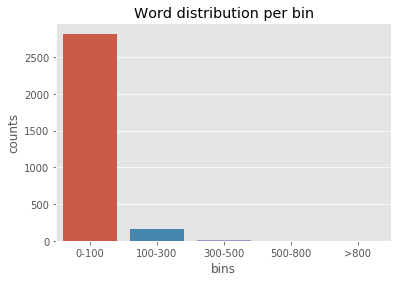

In [86]:
sns.barplot(x='bins', y='counts', data=word_distribution).set_title("Word distribution per bin")

In [87]:
data.head()

,Description,Category,target,num_words,bins
0,hi since recruiter lead permission approve req...,Application,0,12,0-100
1,re expire days hi ask help update passwords co...,Application,0,140,100-300
2,verification warning hi has got attached pleas...,Application,0,14,0-100
3,please dear looks blacklisted receiving mails ...,Application,0,14,0-100
4,dear modules report report cost thank much reg...,Application,0,8,0-100


In [88]:
num_class = len(np.unique(data.Category.values))
y = data['target'].values

In [89]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int8)

# Topic Modelling

In [90]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
#from mpl_toolkits.basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

In [91]:
data['Description'] = data['Description'].astype(str)

In [92]:
type(data['Description'])

pandas.core.series.Series

In [93]:
data_description = data.Description.values

In [94]:
type(data_description)

numpy.ndarray

In [95]:
#cv = # Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1, min_df=1, max_features=None)

# convert text data into term-frequency matrix
data_description = count_vec.fit_transform(data_description)




tfidf_transformer = TfidfTransformer()

# convert term-frequency matrix into tf-idf
tfidf_matrix = tfidf_transformer.fit_transform(data_description)

# create dictionary to find a tfidf word each word
word2tfidf = dict(zip(count_vec.get_feature_names(), tfidf_transformer.idf_))

for word, score in word2tfidf.items():
    print(word, score)

abnormal 8.313553664880422
abort 8.313553664880422
abroad 8.313553664880422
absent 8.313553664880422
absolutely 8.313553664880422
ac 8.313553664880422
accessibility 8.313553664880422
accident 8.313553664880422
accidental 8.313553664880422
accommodate 8.313553664880422
accomplish 8.313553664880422
accomplished 8.313553664880422
accountable 8.313553664880422
accrual 8.313553664880422
accurately 8.313553664880422
ace 8.313553664880422
achievable 8.313553664880422
acknowledging 8.313553664880422
acre 8.313553664880422
adapt 8.313553664880422
adaptors 8.313553664880422
adder 8.313553664880422
adhesive 8.313553664880422
adjacency 8.313553664880422
adjusted 8.313553664880422
administers 8.313553664880422
adv 8.313553664880422
advancement 8.313553664880422
advantageous 8.313553664880422
advantages 8.313553664880422
advertisement 8.313553664880422
advertising 8.313553664880422
advisors 8.313553664880422
advisory 8.313553664880422
affiliate 8.313553664880422
affiliated 8.313553664880422
afford 8

In [96]:
term_frequency = count_vec.vocabulary_
type(term_frequency)

dict

In [97]:
sorted_by_idf = np.argsort(tfidf_transformer.idf_)
feature_names = np.array(count_vec.get_feature_names())
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:10]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-10:]]))

Features with lowest idf:
['abnormal' 'pressed' 'presidential' 'preserving' 'presenting' 'preparer'
 'prepared' 'preparatory' 'premium' 'premier']

Features with highest idf:
['exits' 'exhibitor' 'exhibiting' 'exhaustion' 'exercises' 'exempt'
 'exclusive' 'excluding' 'developed' 'zip']


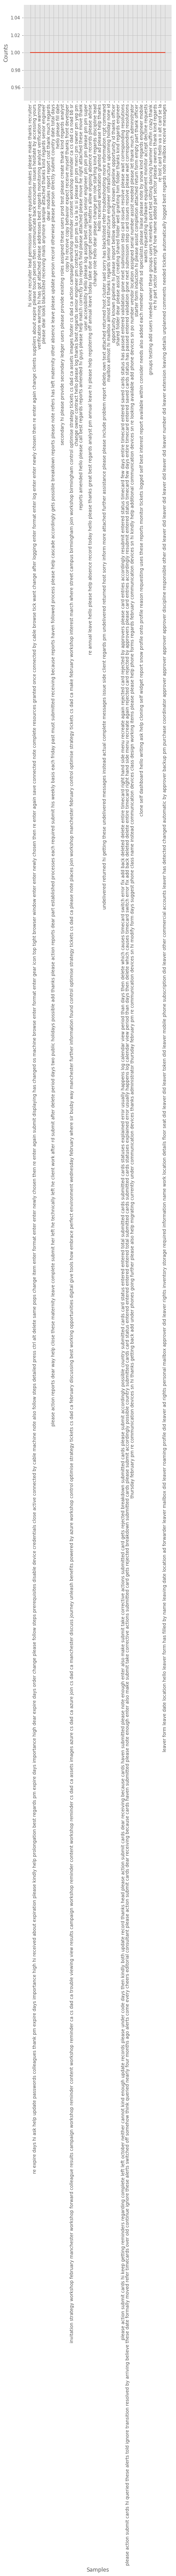

In [98]:
count = nltk.FreqDist(data.Description.values)
count.plot(30)

In [99]:
final_doc = data['Description']
all_documents = tuple(final_doc)

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(all_documents)
print (tfidf_matrix.shape)
print(tfidf_matrix)

(3000, 5103)
  (0, 2101)	0.08626144127793878
  (0, 4178)	0.20563798743451187
  (0, 3647)	0.729155421951029
  (0, 2513)	0.1738031714611934
  (0, 3201)	0.26585087961564136
  (0, 265)	0.23545400931874272
  (0, 3820)	0.3645777109755145
  (0, 2670)	0.2860029411187468
  (0, 3274)	0.06031024879919189
  (0, 2668)	0.18254043930267794
  (0, 4576)	0.10299806622237614
  (1, 2101)	0.03624479915859737
  (1, 3274)	0.038011181285886944
  (1, 3572)	0.09748851917727884
  (1, 1686)	0.2843825725738265
  (1, 1156)	0.1652784930225683
  (1, 310)	0.0397574685934633
  (1, 2087)	0.05318503239712903
  (1, 4846)	0.03918402844581676
  (1, 3155)	0.07020701992458687
  (1, 835)	0.038644198757393236
  (1, 4574)	0.017867571836612323
  (1, 3284)	0.05016616734260602
  (1, 2210)	0.07232773442737224
  (1, 2105)	0.0690830715959424
  :	:
  (2999, 2436)	0.1002338918060217
  (2999, 2875)	0.1582767949475123
  (2999, 1210)	0.17727442589055542
  (2999, 5055)	0.16731196181627883
  (2999, 4212)	0.13942498318403396
  (2999, 2870)	0.

In [101]:
reindexed_data= data["Description"]

data_text = data[['Description']]
data_text['index'] = data_text.index
documents=data_text


print(len(documents))
print(documents[:5])

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk


def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

3000
                                         Description  index
0  hi since recruiter lead permission approve req...      0
1  re expire days hi ask help update passwords co...      1
2  verification warning hi has got attached pleas...      2
3  please dear looks blacklisted receiving mails ...      3
4  dear modules report report cost thank much reg...      4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [102]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
stemmer.stem('identified')


doc_sample = documents[documents['index'] == 5].values[0][0]
print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))


processed_docs = documents['Description'].map(preprocess)
processed_docs[:5]

original document: 
['please', 'action', 'reports', 'dear', 'way', 'help', 'close', 'these', 'maternity', 'leave', 'complete', 'submit', 'her', 'left', 'he', 'technically', 'left', 'he', 'client', 'work', 'after', 'rd', 'submit', 'after', 'delete', 'period', 'days', 'two', 'public', 'holidays', 'possible', 'add', 'thanks', 'please', 'action', 'reports', 'dear', 'part', 'established', 'processes', 'each', 'required', 'submit', 'his', 'weekly', 'basis', 'each', 'friday', 'past', 'must', 'submitted', 'receiving', 'because', 'reports', 'haven', 'followed', 'process', 'please', 'help', 'cascade', 'accordingly', 'gets', 'possible', 'breakdown', 'reports', 'please', 'note', 'refers', 'has', 'left', 'maternity', 'other', 'absence', 'leave', 'please', 'update', 'person', 'record', 'otherwise', 'please', 'person', 'directly', 'submit', 'country', 'date', 'total', 'days']


 tokenized and lemmatized document: 


LookupError: 
**********************************************************************
  Resource [93mwordnet[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('wordnet')
  [0m
  Attempted to load [93mcorpora/wordnet[0m

  Searched in:
    - 'C:\\Users\\WONDER/nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\share\\nltk_data'
    - 'C:\\ProgramData\\Anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\WONDER\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

In [ ]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[123]

In [ ]:
#Preview Bag Of Words for our sample preprocessed document.
bow_doc_123 = bow_corpus[123]
for i in range(len(bow_doc_123)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_123[i][0], 
                                               dictionary[bow_doc_123[i][0]], 
bow_doc_123[i][1]))

In [ ]:
#TF-IDF
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

In [ ]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [ ]:
# Print the results
import pickle

# Here we can assign topic names to each topic list, you can specify the number of words you want to have shown (e.g num_words = 5)
result = lda_model.print_topics(num_topics=5, num_words=5)
print(result)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

In [ ]:

# put these in a file and name the topics
with open("lda_topics_result.txt", "w") as f:
    for s in result:
        f.write(str(s) +"\n")

In [ ]:
# Visualize
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(lda_model, bow_corpus,dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

In [ ]:
from collections import OrderedDict

data_lda = {i: OrderedDict(lda_model.show_topic(i,25)) for i in range(5)}

In [ ]:
import pandas as pd

df_lda = pd.DataFrame(data_lda)
print(df_lda.shape)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

In [ ]:
df_lda

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

g=sns.clustermap(df_lda.corr(), center=0, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(12, 12))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()

In [ ]:
MAX_LENGTH = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.Description.values)
post_seq = tokenizer.texts_to_sequences(data.Description.values)
post_seq_padded = pad_sequences(post_seq, maxlen=MAX_LENGTH)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(post_seq_padded, y, test_size=0.05,random_state=42)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1

# Deep Learning Model Simple

In [ ]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)
x = Flatten()(embedding_layer)
x = Dense(32, activation='relu')(x)

predictions = Dense(num_class, activation='softmax')(x)
model = Model(inputs=[inputs], outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model.summary()
filepath="weights-simple.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=10, callbacks=[checkpointer])

In [ ]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [ ]:
predicted = model.predict(X_test)
predicted = np.argmax(predicted, axis=1)
accuracy_score(y_test, predicted)


In [ ]:
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

# RNN

In [ ]:
inputs = Input(shape=(MAX_LENGTH, ))
embedding_layer = Embedding(vocab_size,
                            128,
                            input_length=MAX_LENGTH)(inputs)

x = LSTM(64)(embedding_layer)
x = Dense(32, activation='relu')(x)
predictions = Dense(num_class, activation='softmax')(x)
model_lstm = Model(inputs=[inputs], outputs=predictions)
model_lstm.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

model_lstm.summary()

In [ ]:
filepath="weights.hdf5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model_lstm.fit([X_train], batch_size=64, y=to_categorical(y_train), verbose=1, validation_split=0.25, 
          shuffle=True, epochs=20, callbacks=[checkpointer])

In [ ]:
df = pd.DataFrame({'epochs':history.epoch, 'accuracy': history.history['acc'], 'validation_accuracy': history.history['val_acc']})
g = sns.pointplot(x="epochs", y="accuracy", data=df, fit_reg=False)
g = sns.pointplot(x="epochs", y="validation_accuracy", data=df, fit_reg=False, color='green')

In [ ]:
model_lstm.load_weights('weights.hdf5')
predicted = model_lstm.predict(X_test)


In [ ]:
predicted

In [ ]:
predicted = np.argmax(predicted, axis=1)

In [ ]:
accuracy_score(y_test, predicted)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import itertools

In [ ]:
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

In [ ]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(data.Category.values)
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test, predicted)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(model_lstm,'model.pkl')

In [ ]:
train_text, test_text, train_y, test_y = train_test_split(df['reviews.text'],df['target'],test_size = 0.5)

In [ ]:
MAX_NB_WORDS = 20000

# get the raw text data
texts_train = train_text.astype(str)
texts_test = test_text.astype(str)

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))


In [ ]:
sequences[0]

In [ ]:
type(tokenizer.word_index), len(tokenizer.word_index)

In [ ]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [ ]:
" ".join([index_to_word[i] for i in sequences[0]])

In [ ]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=50);

In [ ]:
plt.hist([l for l in seq_lens if l < 200], bins=50);

In [ ]:
MAX_SEQUENCE_LENGTH = 150

# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

In [ ]:
y_train = train_y
y_test = test_y

y_train = to_categorical(np.asarray(y_train))
print('Shape of label tensor:', y_train.shape)
print('Shape of label tensor:', y_test.shape)
print('Shape of label tensor:', x_test.shape)


In [ ]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

In [ ]:
from keras.layers import Dense, Input, Flatten
from keras.layers import GlobalAveragePooling1D, Embedding
from keras.models import Model

EMBEDDING_DIM = 50
N_CLASSES = 6

# input: a sequence of MAX_SEQUENCE_LENGTH integers
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_layer = Embedding(MAX_NB_WORDS, EMBEDDING_DIM,
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=True)
embedded_sequences = embedding_layer(sequence_input)

average = GlobalAveragePooling1D()(embedded_sequences)
predictions = Dense(N_CLASSES, activation='softmax')(average)

model = Model(sequence_input, predictions)
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['categorical_accuracy'])

In [ ]:
model.fit(x_train, y_train, validation_split=0.1,
          nb_epoch=10, batch_size=128)

In [ ]:
score = model.evaluate(x_test, y_test, 
                       batch_size=128, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from sklearn.metrics import classification_report
target_names = ["0","1","2","3","4"]

In [ ]:
output_test = model.predict(x_test)
print(output_test)
#print(classification_report(y_test, output_test,target_names=target_names))
#print("test auc:", roc_auc_score(y_test,output_test[:,1]))